Author: Shankar J  
Website: https://shankar-jayaraj.github.io/  
LinkedIn: https://www.linkedin.com/in/drshankarj  
Licensed under CC BY-NC-SA 4.0. 

# Dimensionality Reduction Technique - Principal Component Analysis

<!-- Author: Shankar J  
Website: https://shankar-jayaraj.github.io/  
LinkedIn: https://www.linkedin.com/in/drshankarj  
Licensed under CC BY-NC-SA 4.0.  -->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:

# Step 0: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

input_features = iris.feature_names
target_names = iris.target_names

print("Input Features ", input_features)
print("Output Class", target_names)

Input Features  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Output Class ['setosa' 'versicolor' 'virginica']


In [3]:
unique,counts = np.unique(iris.target, return_counts = True)
print(unique,counts)

[0 1 2] [50 50 50]


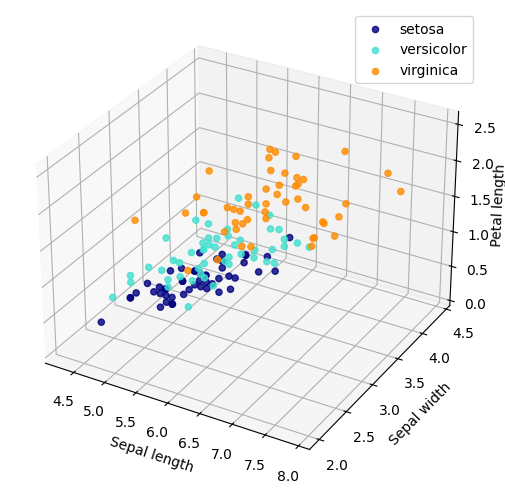

In [4]:
# Create a 3D scatter plot using the first three features
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Define colors and labels for each species
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 3], color=color, alpha=.8,
               label=target_name)

# Label the axes
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length', labelpad=-1)

# Add a legend
ax.legend(loc='best', shadow=False, scatterpoints=1)

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
# Step 1: Standardize the data
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_std.shape

(150, 4)

In [6]:
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_std.T)
print("Covariance Matrix: \n",cov_matrix)

Covariance Matrix: 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [7]:
# Step 3: Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigen Values:", eigenvalues)
print("Eigen Vectors:\n", eigenvectors)

Eigen Values: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigen Vectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [8]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [9]:
# Step 5: Select the first two principal components
n_components = 2
pc = eigenvectors[:, :n_components]
pc

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [10]:
print(X_std.shape)
print(pc.shape)

(150, 4)
(4, 2)


In [11]:
# Step 6: Project the data onto the new subspace
X_pca = X_std.dot(pc)

In [12]:

# Step 1: Compute the d-dimensional mean vectors for different classes
def compute_mean_vectors(X, y):
    class_labels = np.unique(y)
    mean_vectors = []
    for cl in class_labels:
        mean_vectors.append(np.mean(X[y == cl], axis=0))
    return mean_vectors

mean_vectors = compute_mean_vectors(X, y)

mean_vectors

[array([5.006, 3.428, 1.462, 0.246]),
 array([5.936, 2.77 , 4.26 , 1.326]),
 array([6.588, 2.974, 5.552, 2.026])]

In [13]:

# Step 2: Compute the Scatter Matrices (Within-class and Between-class Scatter Matrix)
def compute_scatter_matrices(X, y, mean_vectors):
    class_labels = np.unique(y)
    n_features = X.shape[1]
    S_W = np.zeros((n_features, n_features))
    S_B = np.zeros((n_features, n_features))
    overall_mean = np.mean(X, axis=0)
    
    for cl, mean_vec in zip(class_labels, mean_vectors):
        # Within-class scatter matrix
        class_sc_mat = np.zeros((n_features, n_features))
        for row in X[y == cl]:
            row, mv = row.reshape(n_features, 1), mean_vec.reshape(n_features, 1)
            class_sc_mat += (row - mv).dot((row - mv).T)
        S_W += class_sc_mat
        
        # Between-class scatter matrix
        n = X[y == cl].shape[0]
        mean_vec = mean_vec.reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    return S_W, S_B

S_W, S_B = compute_scatter_matrices(X, y, mean_vectors)

# computed scatter matrices
print("Within-class Scatter Matrix (S_W):\n")
print(S_W)
print("\nBetween-class Scatter Matrix (S_B):\n")
print(S_B)

Within-class Scatter Matrix (S_W):

[[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]

Between-class Scatter Matrix (S_B):

[[ 63.21213333 -19.95266667 165.2484      71.27933333]
 [-19.95266667  11.34493333 -57.2396     -22.93266667]
 [165.2484     -57.2396     437.1028     186.774     ]
 [ 71.27933333 -22.93266667 186.774       80.41333333]]


In [14]:

# Step 3: Solve the generalized eigenvalue problem for the matrix S_W^-1 * S_B
def compute_eigenvectors(S_W, S_B):
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W)@(S_B))
    return eig_vals, eig_vecs

eig_vals, eig_vecs = compute_eigenvectors(S_W, S_B)

# Print the computed eigen values and vectors
print("Eigen Values (eig_vals) : \n")
print(eig_vals)
print("\n Eigen Vectors (eig_vecs): \n")
print(eig_vecs)

Eigen Values (eig_vals) : 

[ 3.21919292e+01  2.85391043e-01  6.51838874e-15 -9.09038465e-15]

 Eigen Vectors (eig_vecs): 

[[ 0.20874182 -0.00653196  0.80446032 -0.46445942]
 [ 0.38620369 -0.58661055 -0.12419663  0.43933435]
 [-0.55401172  0.25256154 -0.07421855  0.4872894 ]
 [-0.7073504  -0.76945309 -0.57611665 -0.59482082]]


In [15]:

# Step 4: Select linear discriminants for the new feature subspace
def select_linear_discriminants(eig_vals, eig_vecs, num_components):
    # Sort the eigenvectors by decreasing eigenvalues
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    W = np.hstack([eig_pairs[i][1].reshape(eig_vecs.shape[0], 1) for i in range(num_components)])
    return W

W = select_linear_discriminants(eig_vals, eig_vecs, num_components=2)  # for 2D projection
print(W)



[[ 0.20874182 -0.00653196]
 [ 0.38620369 -0.58661055]
 [-0.55401172  0.25256154]
 [-0.7073504  -0.76945309]]


In [16]:

# Step 5: Transform the samples onto the new subspace
def transform(X, W):
    X_lda = X.dot(W)
    return X_lda

X_lda = transform(X, W)
X_lda.shape

(150, 2)

In [17]:
X.shape

(150, 4)

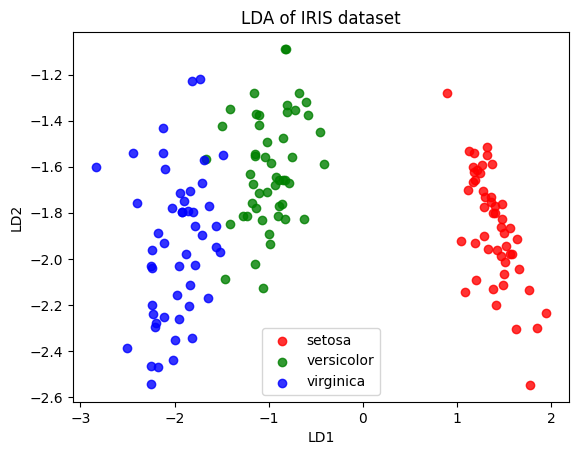

In [18]:

# Visualizing the results
plt.figure()
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1],alpha=0.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

In [19]:
# Solve the generalized eigenvalue problem for the matrix S_W^-1 * S_B
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
# Print the computed eigen values and vectors
print("Eigen Values (eig_vals) : \n")
print(eig_vals)
print("\n Eigen Vectors (eig_vecs): \n")
print(eig_vecs)

Eigen Values (eig_vals) : 

[ 3.21919292e+01  2.85391043e-01  6.51838874e-15 -9.09038465e-15]

 Eigen Vectors (eig_vecs): 

[[ 0.20874182 -0.00653196  0.80446032 -0.46445942]
 [ 0.38620369 -0.58661055 -0.12419663  0.43933435]
 [-0.55401172  0.25256154 -0.07421855  0.4872894 ]
 [-0.7073504  -0.76945309 -0.57611665 -0.59482082]]


In [20]:

# Sort the eigenvectors by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print(eig_pairs)


[(32.19192919827803, array([ 0.20874182,  0.38620369, -0.55401172, -0.7073504 ])), (0.28539104262306697, array([-0.00653196, -0.58661055,  0.25256154, -0.76945309])), (6.51838874062166e-15, array([ 0.80446032, -0.12419663, -0.07421855, -0.57611665])), (9.09038465179265e-15, array([-0.46445942,  0.43933435,  0.4872894 , -0.59482082]))]
[(32.19192919827803, array([ 0.20874182,  0.38620369, -0.55401172, -0.7073504 ])), (0.28539104262306697, array([-0.00653196, -0.58661055,  0.25256154, -0.76945309])), (9.09038465179265e-15, array([-0.46445942,  0.43933435,  0.4872894 , -0.59482082])), (6.51838874062166e-15, array([ 0.80446032, -0.12419663, -0.07421855, -0.57611665]))]


In [21]:

# Select the top eigenvector for 1D projection (LD1)
W = eig_pairs[0][1].reshape(X.shape[1], 1)
W

array([[ 0.20874182],
       [ 0.38620369],
       [-0.55401172],
       [-0.7073504 ]])

In [22]:

# Transform the samples onto the new subspace
X_lda = X.dot(W)
X_lda.shape

(150, 1)

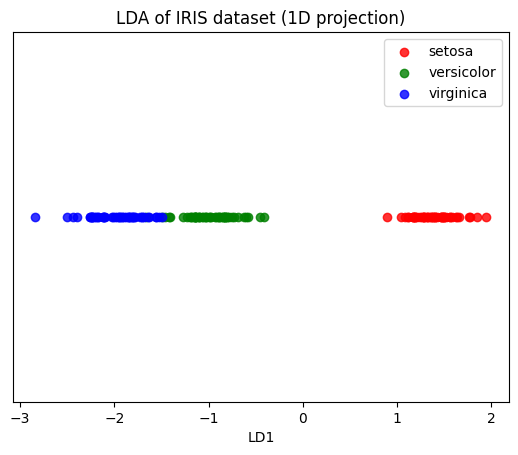

In [23]:

# Visualizing the results in 1D
plt.figure()
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i], np.zeros_like(X_lda[y == i]), alpha=0.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset (1D projection)')
plt.xlabel('LD1')
plt.yticks([])
plt.show()

In [24]:
# Calculate pooled covariance matrix for Mahalanobis distance
def pooled_covariance(X, y, mean_vectors):
    n_features = X.shape[1]
    S_W = np.zeros((n_features, n_features))
    for cl, mean_vec in zip(np.unique(y), mean_vectors):
        class_sc_mat = np.cov(X[y == cl].T)
        S_W += class_sc_mat
    return S_W / len(np.unique(y))

pooled_cov = pooled_covariance(X, y, mean_vectors)
pooled_cov

array([[0.26500816, 0.09272109, 0.16751429, 0.03840136],
       [0.09272109, 0.11538776, 0.05524354, 0.0327102 ],
       [0.16751429, 0.05524354, 0.18518776, 0.04266531],
       [0.03840136, 0.0327102 , 0.04266531, 0.04188163]])

In [25]:

# Define Euclidean and Mahalanobis distance functions
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def mahalanobis_distance(x, mean, cov):
    return np.sqrt((x - mean).T @ np.linalg.inv(cov) @ (x - mean))


In [26]:

# Classification function
def classify_sample(sample, mean_vectors, cov, distance='euclidean'):
    distances = []
    if distance == 'euclidean':
        for mean in mean_vectors:
            distances.append(euclidean_distance(sample, mean))
    elif distance == 'mahalanobis':
        for mean in mean_vectors:
            distances.append(mahalanobis_distance(sample, mean, cov))
    return np.argmin(distances)



In [27]:
# input sample
sample = X[0]
sample

array([5.1, 3.5, 1.4, 0.2])

In [28]:
# sample class
y[0]

0

In [29]:
# Example of classifying the first sample
sample = X[0]
class_euclidean = classify_sample(sample, mean_vectors, None, 'euclidean')
class_mahalanobis = classify_sample(sample, mean_vectors, pooled_cov, 'mahalanobis')


In [30]:

print(f"Classified as {class_euclidean} using Euclidean distance")
print(f"Classified as {class_mahalanobis} using Mahalanobis distance")

Classified as 0 using Euclidean distance
Classified as 0 using Mahalanobis distance


In [31]:
#Comparing Mahalanobis Distance and Euclidean Distance classification

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier (compute mean vectors and covariance matrix)
mean_vectors = compute_mean_vectors(X_train, y_train)
pooled_cov = pooled_covariance(X_train, y_train, mean_vectors)

# Make predictions on the test set
y_pred_euclidean = [classify_sample(sample, mean_vectors, None, 'euclidean') for sample in X_test]
y_pred_mahalanobis = [classify_sample(sample, mean_vectors, pooled_cov, 'mahalanobis') for sample in X_test]

# Calculate the accuracy for both classifiers
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_mahalanobis = accuracy_score(y_test, y_pred_mahalanobis)

print(f'Euclidean Distance Classifier Accuracy: {accuracy_euclidean:.2f}')
print(f'Mahalanobis Distance Classifier Accuracy: {accuracy_mahalanobis:.2f}')

Euclidean Distance Classifier Accuracy: 0.97
Mahalanobis Distance Classifier Accuracy: 1.00


In [33]:
#using functions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

In [34]:
#Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Train the LDA model on the training data
lda = LDA(n_components=2)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [37]:
# Transform both training and testing data
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

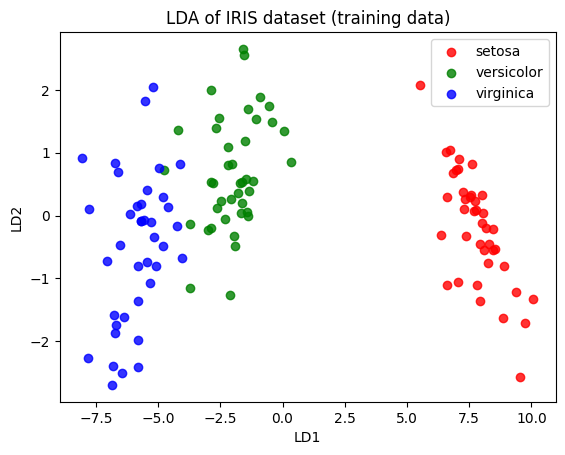

In [38]:
#Visualize the transformed training data in 2D
plt.figure()
colors = ['red', 'green', 'blue']
target_names = iris.target_names

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], alpha=0.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset (training data)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

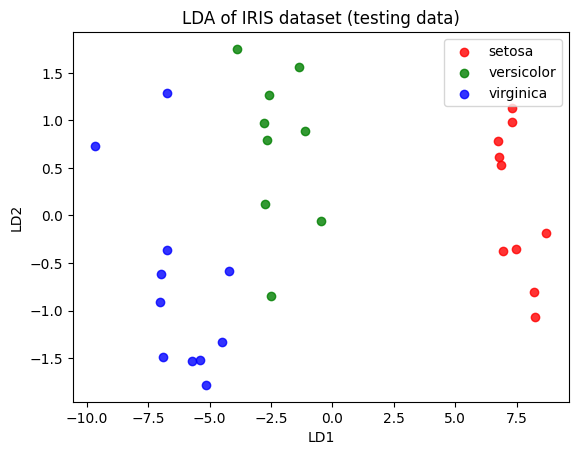

In [39]:
#Visualize the transformed testing data in 2D
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_test_lda[y_test == i, 0], X_test_lda[y_test == i, 1], alpha=0.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset (testing data)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
# Make predictions on the test data
y_pred = lda.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00
